In [1]:
# Command to enable 3d widgets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree



In [2]:
# Loads the movie dataset.
movie_df = pd.read_csv("movie.csv", delimiter=",")

oscars = pd.read_csv("the_oscar_award.csv")

In [3]:
counts = movie_df["movie_imdb_link"].value_counts()

len(counts[counts > 1])

117

In [4]:
movie_df = movie_df.drop_duplicates(subset=["movie_imdb_link"], keep="first")

movie_df["movie_imdb_link"].value_counts().max()

1

In [5]:
counts = movie_df["movie_title"].value_counts()
len(counts[counts > 1])

2

In [6]:
movie_df["movie_title"].fillna(0, inplace=True)

In [7]:
counts = movie_df["movie_title"].value_counts()
counts.head()

The Host            2
Out of the Blue     2
Avatar              1
The Rose            1
Glitter             1
Name: movie_title, dtype: int64

In [8]:
oscars.dropna(how="any", inplace=True)

# Drops all oscar nominations that have not won
oscars = oscars[oscars["winner"]]

oscars.loc[(oscars["film"] == oscars["film"]) & (oscars["year_film"] != oscars["year_film"]), :].shape

(0, 7)

In [9]:
# Drops all oscars but one for each film.
oscars.drop_duplicates("film", keep="last", inplace=True)

oscars.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
6,1927,1928,1,ART DIRECTION,William Cameron Menzies,The Dove;,True
11,1927,1928,1,DIRECTING (Comedy Picture),Lewis Milestone,Two Arabian Knights,True
21,1927,1928,1,OUTSTANDING PICTURE,Paramount Famous Lasky,Wings,True
22,1927,1928,1,UNIQUE AND ARTISTIC PICTURE,Fox,Sunrise,True


In [10]:
# Rename column names to match meaning in new dataset.
oscars = oscars.rename({"film" : "movie_title", "winner" : "oscar"}, axis=1)
# We only select the columns we need.
oscars = oscars[["movie_title", "oscar"]]

def quick_clean(movie_data):
    """strips a string and turns all characters to lower caps."""
    return movie_data.lower().strip()

# Cleans the name of the movie title in both datasets.
oscars["movie_title"] = oscars["movie_title"].apply(quick_clean)
movie_df["movie_title"] = movie_df["movie_title"].apply(quick_clean)

# Merges the two datasets on the movie title.
movie_df = pd.merge(movie_df, oscars, on="movie_title", how="left") 
movie_df["oscar"] = movie_df["oscar"].fillna(False)

print(movie_df.shape)

movie_df["oscar"].isna().sum()

(4919, 29)


0

In [11]:
counts = movie_df["movie_title"].value_counts()
counts.head()

the dead zone                                       2
the host                                            2
out of the blue                                     2
avatar                                              1
the haunting in connecticut 2: ghosts of georgia    1
Name: movie_title, dtype: int64

In [17]:
movie_df_drop = movie_df.drop(['color', 'director_name','plot_keywords','content_rating','title_year','actor_2_facebook_likes','aspect_ratio','num_critic_for_reviews','actor_2_name','actor_3_name','movie_imdb_link','language','country','movie_title','actor_1_name','director_facebook_likes','actor_3_facebook_likes','facenumber_in_poster','actor_1_facebook_likes','num_user_for_reviews','budget','cast_total_facebook_likes','movie_facebook_likes','num_voted_users','imdb_score'], axis = 1)

In [18]:
movie_df_drop["gross"].fillna(0, inplace=True)

In [19]:
movie_df_drop["duration"].fillna(0, inplace=True)

In [20]:
movie_df_drop.isna().sum()

duration    0
gross       0
genres      0
oscar       0
dtype: int64

In [21]:
is_categorical = np.where(movie_df_drop.dtypes == 'object')[0]
movie_binary = pd.get_dummies(data = movie_df_drop, columns = movie_df_drop.columns[is_categorical])
movie_binary  # 

,duration,gross,oscar,genres_Action,genres_Action|Adventure,genres_Action|Adventure|Animation|Comedy|Crime|Family|Fantasy,genres_Action|Adventure|Animation|Comedy|Drama|Family|Fantasy|Thriller,genres_Action|Adventure|Animation|Comedy|Drama|Family|Sci-Fi,genres_Action|Adventure|Animation|Comedy|Family,genres_Action|Adventure|Animation|Comedy|Family|Fantasy,...,genres_Mystery|Western,genres_Romance,genres_Romance|Sci-Fi|Thriller,genres_Romance|Short,genres_Sci-Fi,genres_Sci-Fi|Thriller,genres_Thriller,genres_Thriller|War,genres_Thriller|Western,genres_Western
0,178.0,760505847.0,True,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,169.0,309404152.0,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,148.0,200074175.0,True,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,164.0,448130642.0,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4914,87.0,0.0,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4915,43.0,0.0,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,76.0,0.0,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4917,100.0,10443.0,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
X_train, X_test, y_train, y_test = \
train_test_split(movie_binary.drop(['oscar'], axis = 1), \
                 movie_binary['oscar'], train_size = 0.7, random_state = 42)

In [24]:
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [25]:
model_pred = model.predict(X_test)
np.round(accuracy_score(y_test, model_pred),3) 

0.922

In [26]:
# Itereren over een aantal hyperparameters
max_depth = 200
depths = range(max_depth)
min_leaf = [5,10,25,50]
min_split = [5, 10,25,50]

best_depth = 0
best_leaf = 0
best_split = 0
highscore = 0

for depth in depths[1:]:
    for leaf in min_leaf:
        for split in min_split:
            model = DecisionTreeClassifier(max_depth=depth, min_samples_leaf = leaf, min_samples_split = split)
            model.fit(X_train, y_train)
            model_pred = model.predict(X_test)
            score = accuracy_score(y_test, model_pred) 
            if score > highscore:
                highscore = score
                best_depth = depth
                best_leaf = leaf
                best_split = split

In [27]:
print("Highscore: ", np.round(highscore,4))
print("Best max_depth: ", best_depth)
print("Best min_leaf: ", best_leaf)
print("Best min_split: ", best_split)

Highscore:  0.9255
Best max_depth:  1
Best min_leaf:  5
Best min_split:  5


In [28]:
y_pred_baseline = np.zeros(len(y_test))

In [29]:
accuracy_score(y_test, y_pred_baseline)

0.9254742547425474

In [30]:
model = DecisionTreeClassifier(max_depth=best_depth, min_samples_leaf = best_leaf, min_samples_split = best_split)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=5, min_samples_split=5)

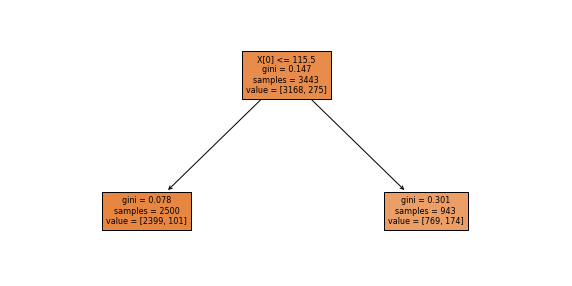

In [31]:
fig = plt.figure(figsize=(10,5))
_ = tree.plot_tree(model, filled=True, fontsize = 8)